# topic : missing data ( cca=complite case analysis)

In [2]:
import pandas as pd
import numpy as np


In [6]:
data=pd.read_csv(r"C:\Users\mdfir\Downloads\data_science_job.csv")

In [8]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB


In [12]:
data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [14]:
data.shape

(19158, 13)

In [22]:
((data.isnull().sum())/data.isnull().sum().sum())*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.222222
gender                    20.913941
relevent_experience        0.000000
enrolled_university        1.790768
education_level            2.134076
major_discipline          13.050336
experience                 0.301554
company_size              27.548133
company_type              28.485270
training_hours             3.553700
target                     0.000000
dtype: float64

In [24]:
data.isnull().sum().sum()

21555

In [26]:
data.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [34]:
# use cca when my columns data missing value persentage lessthen 5%
cols=[var for var in data.columns if data[var].isnull().mean()<0.05 and data[var].isnull().mean() > 0]


In [38]:
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [44]:
data[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
8683,0.624,Full time course,Graduate,4.0,4.0
17626,0.920,no_enrollment,NaN,10.0,20.0
11711,0.698,no_enrollment,Graduate,5.0,25.0
6337,0.939,no_enrollment,Graduate,20.0,30.0
7350,0.762,no_enrollment,Masters,1.0,30.0


In [54]:
# after drop the data persentage 
len(data[cols].dropna())/len(data)

0.8968577095730244

In [60]:
# after shape  and before shape using dropna functions 
new_data=data[cols].dropna()
data.shape,new_data.shape

((19158, 13), (17182, 5))

In [62]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'after |the drop ')

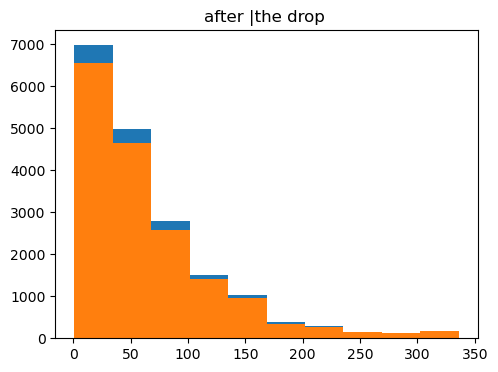

In [76]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.hist(data["training_hours"])
plt.title("before the drop ")
plt.subplot(121)
plt.hist(new_data["training_hours"])
plt.title("after |the drop ")


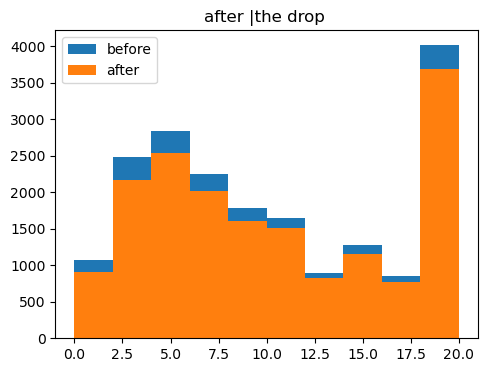

In [86]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.hist(data["experience"],label="before")
plt.legend()
plt.title("before the drop ")
plt.subplot(121)
plt.hist(new_data["experience"],label="after")
plt.title("after |the drop ")
plt.legend()